# Combine Results from Different Models into a Single Data File

## Preamble

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

import numpy as np

import dill

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from cycler import cycler

import sys
sys.path.append('../')
import fluctuations
import twenty_one
import physics as phys

from tqdm.notebook import tqdm

In [3]:
z_ary = np.array([4, 5, 6, 7, 8, 9, 17])
T_s_ary = np.array([1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 1e-1])

T_CMB_ary = phys.TCMB(1. + z_ary) / phys.kB

omega_b_h = phys.omega_baryon * phys.h 

tau_ary_1 = (
    9.85e-3 * (T_CMB_ary / T_s_ary) * (omega_b_h / 0.0327) 
    * (phys.omega_m / 0.307)**(-0.5) * np.sqrt((1. + z_ary) / 10.)
)

T_21_1 = (T_s_ary - T_CMB_ary) * (1. - np.exp(-tau_ary_1)) / (1. + z_ary)

# Use full expression. 
A_21     = 2.85e-15 # decay constant of excited state in sec^-1
omega_10 = 0.0681462 # hyperfine splitting in K
k_10     = omega_10 * phys.kB / (phys.hbar * phys.c)   # hyperfine splitting in cm^-1

xi_ary = omega_10 / T_s_ary     

tau_ary_2 = 3 * np.pi**2 * A_21 * phys.nH * (1. + z_ary)**3 / phys.hubble(1. + z_ary) / k_10**3 * (
    (1. - np.exp(-xi_ary)) / (1. + 3. * np.exp(-xi_ary))
)


xi_corr_fac_ary = xi_ary * np.exp(-xi_ary) / (1. - np.exp(-xi_ary))

T_21_2 = (T_s_ary * xi_corr_fac_ary - T_CMB_ary) * (1. - np.exp(-tau_ary_2)) / (1. + z_ary)

print(T_21_1) 
print(T_21_2)

[-2.72498    -2.72483333 -2.72357096 -2.30828984 -0.53115257 -0.04528832
 -2.71503731]
[-2.71377564 -2.72305413 -2.72468643 -2.41373107 -0.54052561 -0.04552277
 -2.71948093]


In [4]:
# Load plot settings

from plot_params import params
pylab.rcParams.update(params)

cols_default = plt.rcParams['axes.prop_cycle'].by_key()['color']

## Abscissa

In [5]:
Tb_data_folder = '/scratch/gpfs/hongwanl/millicharged_DM_with_bath/Vrel_scan_fixed_He_bug/for_Anastasia/'

mm_string_list = ['10_MeV', '30_MeV', '100_MeV', '300_MeV', '1_GeV', '3_GeV', '10_GeV', '30_GeV', '100_GeV', '300_GeV']

Vlis = np.loadtxt(open(Tb_data_folder+'Vlis.csv'), delimiter=',')
Qlis = np.loadtxt(open(Tb_data_folder+'Qlis.csv'), delimiter=',')
# Flipped so that it is in increasing order
zlis = np.flipud(np.loadtxt(open(Tb_data_folder+'zlis.csv'), delimiter=','))

# in GeV
mmlis = np.array([0.01, 0.03, 0.1, 0.3, 1., 3., 10., 30., 100., 300.])

T21_fluc = dill.load(open('/scratch/gpfs/hongwanl/millicharged_DM_with_bath/power_spec/all_models/mc100MeV_full_smooth_deg3_1.p', 'rb'))

In [6]:
import pickle

Tb_data = pickle.load(open('/scratch/gpfs/hongwanl/millicharged_DM_with_bath/Vrel_scan_fixed_He_bug/for_Anastasia/compiled_data.p', 'rb'))

[Tb, Tm, Tc, Vbm, Vmc, xe]
17.0
(90, 161, 3990, 10, 6)


(0.01, 10000.0)

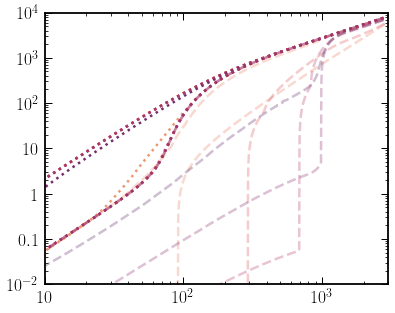

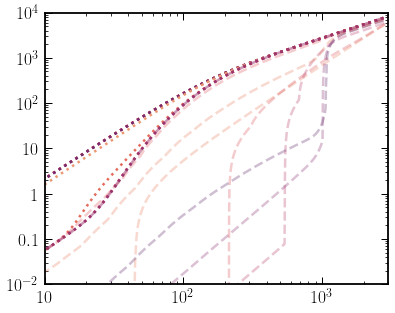

In [7]:
print(Tb_data['inputs'])
print(Tb_data['z'][-8])
# Q x Vrel x z x mm x inputs
print(Tb_data['data'].shape)

plt.rc('axes', prop_cycle=cycler('color', sns.color_palette('flare', 10)))


plt.figure()

plt.loglog()

for i,Q in enumerate(Tb_data['Q']):

    if i % 10 != 0: 

        continue

    plt.plot(Tb_data['z'], Tb_data['data'][i, 0, :, 4, 0] / phys.kB, ls=':')
    plt.plot(Tb_data['z'], Tb_data['data'][i, 0, :, 4, 1] / phys.kB, ls='--', alpha=0.3)

plt.xlim(10, 3000)
plt.ylim(1e-2, 1e4)

plt.rc('axes', prop_cycle=cycler('color', sns.color_palette('flare', 10)))
 

plt.figure()

plt.loglog()

for i,Q in enumerate(Tb_data['Q']):

    if i % 10 != 0: 

        continue

    plt.plot(Tb_data['z'], Tb_data['data'][i, 0, :, 6, 0] / phys.kB, ls=':')
    plt.plot(Tb_data['z'], Tb_data['data'][i, 0, :, 6, 1] / phys.kB, ls='--', alpha=0.3)

plt.xlim(10, 3000)
plt.ylim(1e-2, 1e4)



## Extract the Global Signal

This cell extracts the global signal from the data files. Run only once. The resulting data file can be loaded and plots made. Something is wrong with model number 136, which gives a bunch of nans, I think because dTK is negative at zlis[0], which doesn't seem right. 

In [8]:
# global_signal_ary = np.zeros((140, 22, 90, 10))

# for idx in tqdm(np.arange(140)): 

#     T21_fluc = dill.load(open('/scratch/gpfs/hongwanl/millicharged_DM_with_bath/power_spec/all_models/mc100MeV_full_smooth_deg3_'+str(idx)+'.p', 'rb'))

#     global_signal = T21_fluc.v_fluc.mean_f(T21_fluc.f_in_v, T21_fluc.v_ary)

#     global_signal_ary[idx, ...] = global_signal 


# dill.dump(global_signal_ary, open('/scratch/gpfs/hongwanl/millicharged_DM_with_bath/power_spec/all_models/global_signal_all_models.p', 'wb'))



### Global Signal Plot

In [9]:
for i in [45, 49, 52, 55, 58, 63]:

    print(Qlis[i])

0.0010807067528039549
0.0020108088432108043
0.003203450204250925
0.005103465327280476
0.008130408367887929
0.01766814729614693


m_m in GeV:  3.0


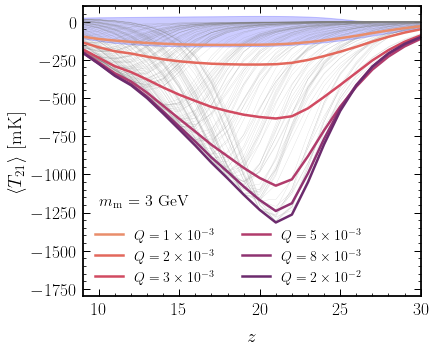

In [10]:
mm_ind = 5

global_signal_ary = dill.load(open('/scratch/gpfs/hongwanl/millicharged_DM_with_bath/power_spec/all_models/global_signal_all_models.p', 'rb'))


print('m_m in GeV: ', T21_fluc.data_dict['m_m'][mm_ind])

plt.figure()

plt.rc('axes', prop_cycle=cycler('color', sns.color_palette('flare', 6)))

palette = sns.color_palette('flare', 6)


# plt.title(r'\textbf{21-cm Global Signal}')

plt.plot(zlis, np.transpose(global_signal_ary[:, :, 63, mm_ind]) * 1e3, color='gray', linewidth=0.1);

plt.gca().set_prop_cycle(None)

plt.plot(zlis, np.nanmin(global_signal_ary[:, :, 45, mm_ind], axis=0) * 1e3, label=r'$Q = 1 \times 10^{-3}$')
plt.plot(zlis, np.nanmin(global_signal_ary[:, :, 49, mm_ind], axis=0) * 1e3, label=r'$Q = 2 \times 10^{-3}$')
plt.plot(zlis, np.nanmin(global_signal_ary[:, :, 52, mm_ind], axis=0) * 1e3, label=r'$Q = 3 \times 10^{-3}$')
plt.plot(zlis, np.nanmin(global_signal_ary[:, :, 55, mm_ind], axis=0) * 1e3, label=r'$Q = 5 \times 10^{-3}$')
plt.plot(zlis, np.nanmin(global_signal_ary[:, :, 58, mm_ind], axis=0) * 1e3, label=r'$Q = 8 \times 10^{-3}$')
plt.plot(zlis, np.nanmin(global_signal_ary[:, :, 63, mm_ind], axis=0) * 1e3, label=r'$Q = 2 \times 10^{-2}$')
plt.plot(zlis, 1e3*np.ones_like(zlis), color=palette[5], linewidth=0.5)

from scipy.io import loadmat

max_T21 = loadmat('/scratch/gpfs/hongwanl/millicharged_DM_with_bath/xA_from_Anastasia/fiducial_astro_maxT21.mat')['bbb'].flatten()
min_T21 = loadmat('/scratch/gpfs/hongwanl/millicharged_DM_with_bath/xA_from_Anastasia/fiducial_astro_minT21.mat')['aaa'].flatten()
astro_models_z_ary = loadmat('/scratch/gpfs/hongwanl/millicharged_DM_with_bath/xA_from_Anastasia/fiducial_astro_z_abscissa.mat')['redshift'].flatten()

plt.fill_between(astro_models_z_ary, max_T21, min_T21, color='blue', alpha=0.2)


plt.text(x=10, y=-1200, s=r'$m_\mathrm{m}$ = 3 GeV', fontsize=16)

plt.legend(ncol=2, fontsize=14)

plt.xlim(9, 30)
plt.ylim(-1800, 100)

plt.xlabel(r'$z$')
plt.ylabel(r'$\langle T_{21} \rangle$ [mK]', labelpad=5)


plt.tight_layout()

plt.savefig('plots/global_signal.pdf')

## Extract the Power Spectrum

This cell extracts the power spectra from the data files. Run only once. The resulting data file can be loaded and plots made. 

In [11]:
# power_spec_ary = np.zeros((140, 22, 90, 10))

# for idx in tqdm(np.arange(140)): 

#     T21_fluc = dill.load(open('/scratch/gpfs/hongwanl/millicharged_DM_with_bath/power_spec/all_models/mc100MeV_full_smooth_deg3_'+str(idx)+'.p', 'rb'))

#     k_ary, delta2_ary = T21_fluc.power_spec

#     # index 1536 for 0.1, 1689 for 0.2, 1601 for 0.134 = 0.2*h

#     power_spec_ary[idx, ...] = delta2_ary[1601]


# dill.dump(power_spec_ary, open('/scratch/gpfs/hongwanl/millicharged_DM_with_bath/power_spec/all_models/power_spec_at_0_134_per_Mpc.p', 'wb'))


### Import Power Spectrum Limits

In [12]:
import os
import yaml
import pandas as pd

directory_str = '/home/hongwanl/eor_limits/eor_limits/data/'
directory = os.fsencode('/home/hongwanl/eor_limits/eor_limits/data/')

# k of interest. Data is saved in units of h/Mpc, so divide by h for k_ref. 
k_ref = 0.135 / 0.67
bounds_df = pd.DataFrame(columns=['telescope', 'author', 'year', 'doi', 'type', 'delta_squared', 'k', 'k_lower', 'k_upper', 'redshift'])
    
for file in os.listdir(directory):
     filename = os.fsdecode(file)
     if filename.split(sep='.')[-1] == 'yaml':
        data = yaml.safe_load(open(directory_str+filename))
        # process the delta_squared data first. 
        processed_delta_squared = []
        # check if the delta_squared list in the yaml file is 2D or 1D. 
        if isinstance(data['delta_squared'][0], list): 
            # it's 2D. iterate over each list in the 2D list.  
            for delta_squared_ary in data['delta_squared']: 
                delta_squared_list = []
                # if it's a float, append it. if it's a string, evaluate it first, unless it's 'nan', in which
                # case, manually append np.nan. 
                for delta_squared in delta_squared_ary:
                    if isinstance(delta_squared, float):
                        delta_squared_list.append(delta_squared)
                    elif delta_squared != 'nan': 
                        delta_squared_list.append(eval(delta_squared))
                    else: 
                        delta_squared_list.append(np.nan)
                processed_delta_squared.append(delta_squared_list)
        else: 
            for delta_squared in data['delta_squared']:
                if delta_squared != 'nan': 
                    processed_delta_squared.append(eval(delta_squared))
                else: 
                    processed_delta_squared.append(np.nan)
        
        if len(data['redshift']) > 1:
            # the redshift list has more than 1 entry.  
            if isinstance(data['redshift'][0], list): 
                # the redshift list contains sublists. 
                for z_idx,z in enumerate(data['redshift']): 
                    for k_idx,k_lower in enumerate(data['k_lower'][z_idx]): 
                        entry = pd.DataFrame.from_dict([{
                            'telescope': data['telescope'],
                            'author': data['author'],
                            'year': data['year'],
                            'doi': data['doi'],
                            'type': data['type'],
                            'delta_squared': processed_delta_squared[z_idx][k_idx],
                            'k': data['k'][z_idx][k_idx],
                            'k_lower': k_lower,
                            'k_upper': data['k_upper'][z_idx][k_idx],
                            'redshift': z[0]
                        }])
                        bounds_df = pd.concat([bounds_df, entry], ignore_index=True)
                        
            else:
                # the redshift list is just a list of redshifts. 
                for k_idx,k_lower in enumerate(data['k_lower']): 
                    entry = pd.DataFrame.from_dict([{
                        'telescope': data['telescope'],
                        'author': data['author'],
                        'year': data['year'],
                        'doi': data['doi'],
                        'type': data['type'],
                        'delta_squared': processed_delta_squared[k_idx],
                        'k': data['k'][k_idx],
                        'k_lower': k_lower,
                        'k_upper': data['k_upper'][k_idx],
                        'redshift': data['redshift'][k_idx]
                    }])
                    bounds_df = pd.concat([bounds_df, entry], ignore_index=True)
        else:
            # only one redshift. 
            for k_idx,k_lower in enumerate(data['k_lower']): 
                entry = pd.DataFrame.from_dict([{
                    'telescope': data['telescope'],
                    'author': data['author'],
                    'year': data['year'],
                    'doi': data['doi'],
                    'type': data['type'],
                    'delta_squared': processed_delta_squared[k_idx],
                    'k': data['k'][k_idx],
                    'k_lower': k_lower,
                    'k_upper': data['k_upper'][k_idx],
                    'redshift': data['redshift'][0]
                }])
                bounds_df = pd.concat([bounds_df, entry], ignore_index=True)

rel_bounds_df = bounds_df[(bounds_df['k_lower'] < k_ref) & (bounds_df['k_upper'] > k_ref)]
# rel_bounds_df = rel_bounds_df.drop(labels=[315, 316, 317, 323, 324, 325, 331, 332, 333])
print(rel_bounds_df)


        telescope     author  year                          doi   type  \
2     MWA phase I      Barry  2019     10.3847/1538-4357/ab40a8   line   
49    MWA phase I  Beardsley  2016  10.3847/1538-4357/833/1/102  point   
51        MWA 32T     Dillon  2014   10.1103/PhysRevD.89.023002  point   
55        MWA 32T     Dillon  2014   10.1103/PhysRevD.89.023002  point   
56        MWA 32T     Dillon  2014   10.1103/PhysRevD.89.023002  point   
62    MWA phase I     Dillon  2015   10.1103/PhysRevD.91.123011  point   
63    MWA phase I     Dillon  2015   10.1103/PhysRevD.91.123011  point   
66           HERA       HERA  2022     10.3847/1538-4357/ac1c78   line   
80           HERA       HERA  2022     10.3847/1538-4357/ac1c78   line   
100  MWA phase II         Li  2019             arXiv:1911.10216   line   
132  MWA phase II         Li  2019             arXiv:1911.10216   line   
163  MWA phase II         Li  2019             arXiv:1911.10216   line   
198         LOFAR    Mertens  2020    

Q:  2.2300500321347896e-05
m_m in GeV:  3.0
k in Mpc^-1:  0.13432950639441527


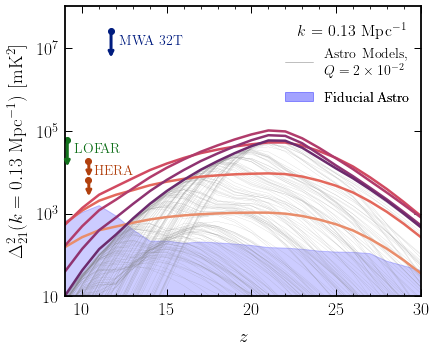

In [13]:
power_spec_ary = dill.load(open('/scratch/gpfs/hongwanl/millicharged_DM_with_bath/power_spec/all_models/power_spec_at_0_134_per_Mpc.p', 'rb'))

plt.rc('axes', prop_cycle=cycler('color', sns.color_palette('flare', 6)))

palette = sns.color_palette('flare', 6)

k_ary, delta2_ary = T21_fluc.power_spec

print('Q: ', T21_fluc.data_dict['Q'][20])
print('m_m in GeV: ', T21_fluc.data_dict['m_m'][mm_ind])
print('k in Mpc^-1: ', k_ary[1601])

plt.figure()

plt.yscale('log')

plt.xlabel(r'$z$')
plt.ylabel(r'$\Delta_{21}^2(k = 0.13$ Mpc$^{-1}$) [mK$^2$]')

# plt.title(r'\bf{21-cm Power Spectrum}')

plt.plot(zlis, np.transpose(power_spec_ary[:, :, 63, mm_ind]) * 1e6, color='gray', linewidth=0.1);

ax = plt.gca()
ax.set_prop_cycle(None)
# plt.plot(zlis, np.nanmax(power_spec_ary[:, :, 20, mm_ind], axis=0) * 1e6, label=r'$Q = 2 \times 10^{-5}$')
# plt.plot(zlis, np.nanmax(power_spec_ary[:, :, 28, mm_ind], axis=0) * 1e6, label=r'$Q = 8 \times 10^{-5}$')
# plt.plot(zlis, np.nanmax(power_spec_ary[:, :, 36, mm_ind], axis=0) * 1e6, label=r'$Q = 3 \times 10^{-4}$')
# plt.plot(zlis, np.nanmax(power_spec_ary[:, :, 44, mm_ind], axis=0) * 1e6, label=r'$Q = 9 \times 10^{-4}$')
# plt.plot(zlis, np.nanmax(power_spec_ary[:, :, 52, mm_ind], axis=0) * 1e6, label=r'$Q = 3 \times 10^{-3}$')
# plt.plot(zlis, np.nanmax(power_spec_ary[:, :, 60, mm_ind], axis=0) * 1e6, label=r'$Q = 10^{-2}$')
# plt.plot(zlis, np.nanmax(power_spec_ary[:, :, 45, mm_ind], axis=0) * 1e6, label=r'$Q = 2 \times 10^{-2}$')

plt.plot(zlis, np.nanmax(power_spec_ary[:, :, 45, mm_ind], axis=0) * 1e6)
plt.plot(zlis, np.nanmax(power_spec_ary[:, :, 49, mm_ind], axis=0) * 1e6)
plt.plot(zlis, np.nanmax(power_spec_ary[:, :, 52, mm_ind], axis=0) * 1e6)
plt.plot(zlis, np.nanmax(power_spec_ary[:, :, 55, mm_ind], axis=0) * 1e6)
plt.plot(zlis, np.nanmax(power_spec_ary[:, :, 58, mm_ind], axis=0) * 1e6)
plt.plot(zlis, np.nanmax(power_spec_ary[:, :, 63, mm_ind], axis=0) * 1e6)
all_astro_plot, = plt.plot(zlis, 0*np.ones_like(zlis), color='gray', linewidth=0.5, label=r'Astro Models,'+'\n'+r'$Q = 2 \times 10^{-2}$')

min_PK = loadmat('/scratch/gpfs/hongwanl/millicharged_DM_with_bath/xA_from_Anastasia/fiducial_astro_minPK.mat')['Paaa'].flatten()
max_PK = loadmat('/scratch/gpfs/hongwanl/millicharged_DM_with_bath/xA_from_Anastasia/fiducial_astro_maxPK.mat')['Pbbb'].flatten()

astro_fiducial_plot = plt.fill_between(astro_models_z_ary, max_PK, min_PK, color='blue', alpha=0.2, label='Fiducial Astro')

palette = sns.color_palette('dark')

color_dict = {'MWA 32T': palette[0], 'HERA': palette[1], 'LOFAR': palette[2], 'MWA phase I': palette[3], 'PAPER': palette[4], 'MWA phase II': palette[3]}

for z,delta_squared,tele in zip(
    rel_bounds_df['redshift'], rel_bounds_df['delta_squared'], rel_bounds_df['telescope']
):

    plt.scatter(z, delta_squared, color=color_dict[tele], linewidth=1)

    if tele == 'HERA':
        ax.annotate(
            "", xy=(z*1.002, delta_squared), 
            xytext=(z*1.002, delta_squared/2.8),
            arrowprops=dict(arrowstyle="<-", color=color_dict[tele], linewidth=3)
        )
    else:
        ax.annotate(
            "", xy=(z*1.002, delta_squared), 
            xytext=(z*1.002, delta_squared/5),
            arrowprops=dict(arrowstyle="<-", color=color_dict[tele], linewidth=3)
        )

# plt.text(x=10, y=3e5, s=r'$m_\mathrm{m}$ = 3 GeV', fontsize=16)
plt.text(x=22.7, y=2e7, s=r'$k$ = 0.13 Mpc$^{-1}$', fontsize=16)

plt.text(x=12.2, y=1.2e7, s='MWA 32T', fontsize=14, color=palette[0])
plt.text(x=10.7, y=9e3, s='HERA', fontsize=14, color=palette[1])
plt.text(x=9.5, y=3e4, s='LOFAR', fontsize=14, color=palette[2])
# plt.text(x=16, y=1e6, s='MWA Phase I', fontsize=14, color=palette[3])


legend1 = plt.legend(handles=[all_astro_plot], fontsize=14, bbox_to_anchor=(1, 0.9))
legend2 = plt.legend(handles=[astro_fiducial_plot], fontsize=14, bbox_to_anchor=(1.005, 0.75))


ax.add_artist(legend1)

ax.add_artist(legend2)

plt.axis([9, 30, 10, 1e8])

plt.tight_layout()

plt.savefig('plots/power_spec.pdf')

In [14]:
np.transpose([astro_models_z_ary, max_PK, min_T21])
print(astro_models_z_ary[11])

17


## Global Signal vs. Power Spectrum

[1.e-02 3.e-02 1.e-01 3.e-01 1.e+00 3.e+00 1.e+01 3.e+01 1.e+02 3.e+02]


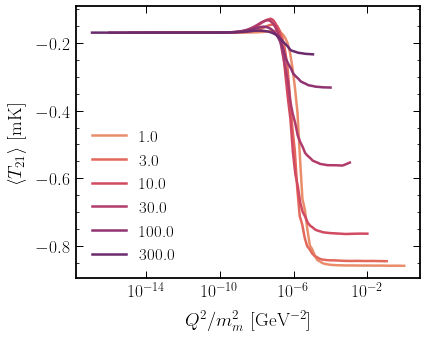

In [15]:
## We want to check that (Q / m_m)^2 is the main dependence of the points. 
z_ind = 8

# Create the global signal vs. power spectrum array at fixed z. Dimensions 140 x 90 x 10 x 2: astro model x Q x m_m x (global signal, power spectrum)
glob_vs_ps_ary = np.transpose([global_signal_ary[:, z_ind, :, :], power_spec_ary[:, z_ind, :, :]], axes=(1, 2, 3, 0))

plt.figure()

plt.xscale('log')

for i,mm in enumerate(mmlis):

    if i < 4: 

        continue

    plt.plot((Qlis/mm)**2, glob_vs_ps_ary[36, :, i, 0], label=mm)

print(mmlis)
plt.xlabel(r'$Q^2 / m_m^2$ [GeV$^{-2}$]')
plt.ylabel(r'$\langle T_{21} \rangle$ [mK]')

plt.legend()



In [16]:
# z_ind = 8

# print('z: ', T21_fluc.data_dict['z'][z_ind])

# # Create the global signal vs. power spectrum array at fixed z. Dimensions 140 x 90 x 10 x 2: astro model x Q x m_m x (global signal, power spectrum)
# glob_vs_ps_ary = np.transpose([global_signal_ary[:, z_ind, :, :], power_spec_ary[:, z_ind, :, :]], axes=(1, 2, 3, 0))

# plt.figure()

# plt.xscale('log')

# # Starting plotting from 100 MeV. Lower bound from our paper, Upper bound from combination of
# # ArgoNeut (1911.07996), Super-K (2002.11732) and colliders from our paper. 

# Q_min_ary = [0., 0., 5.22e-5, 9.63e-5, 1.86e-4, 3.44e-4, 6.66e-4, 1.26e-3, 2.38e-3, 4.39e-3, 8.706e-3]
# Q_max_ary = [0., 0., 0.0033, 0.0067, 0.02075, 0.116, 0.237, 0.237, 0.315, 0.625]


# Q_min_ind = np.argwhere(Qlis > Q_min_ary[mm_ind]).flatten()[0]
# Q_max_ind = np.argwhere(Qlis < Q_max_ary[mm_ind]).flatten()[-1]

# ax = plt.gca()

# # Pick an example model which has a large power spectrum and global signal. 
# model_ind = 36

# # These are the Q indices to plot. 
# Q_indices_to_plot = [49, 55, 60, 64, 70, 74]
# # print(Qlis[49], Qlis[55], Qlis[60], Qlis[64], Qlis[70], Qlis[74])
# # # This is the minimum m_m to start at (1 GeV). 
# # print(mmlis[4])

# # Markers for m_m >= 1 GeV. 
# marker_list = [ 'o', 'X', 'D', '*', 'P', 's']
# # Palette for Q to plot. 
# palette = sns.color_palette('flare', 6)

# for i,_ in enumerate(mmlis):

#     # Obtain the minimum and maximum Qlis indices which are experimentally allowed. 
#     try: 
#         Q_min_ind = np.argwhere(Qlis > Q_min_ary[i]).flatten()[0]
#         Q_max_ind = np.argwhere(Qlis < Q_max_ary[i]).flatten()[-1]
#     except:
#         continue

#     # if i < 4: 
#     #     continue
#     if i != 5: 
#         continue

#     # pt is which charge from 1 -- 6 to plot. j is the actual index of the charge in Qlis. 
#     for pt,j in enumerate(Q_indices_to_plot):

#         if j >= Q_min_ind and j <= Q_max_ind:
#             # This value of Q, i.e. Qlis[j], is allowed. 
#             # print(mmlis[i], Qlis[j])

#             plt.scatter(np.nanmax(glob_vs_ps_ary[model_ind,j,i,1]*1e6, axis=0), np.nanmin(glob_vs_ps_ary[:,j,i,0]*1e3, axis=0), marker=marker_list[i-4], s=120, color=palette[pt], alpha=0.7)

#         else:

#             plt.scatter([0], [0])

# plt.scatter(2.05190707e+02, -1.64398634e+02, marker='*', color='k', s=200)

# plt.xlim(1, 5e4)

# palette = sns.color_palette('dark')

# # Taken from Julian's millicharged paper, and EDGES = -500 mK central value. 
# plt.axhline(-500, color=palette[5])
# # ax.fill_betweenx((-1e4, 1e4), 92.7, 1e6, color=palette[0], alpha=0.1)
# # ax.fill_betweenx((-1e4, 1e4), 1255, 1e6, color=palette[2], alpha=0.1)
# plt.axvline(92.7, color=palette[0], ls=':')
# plt.axvline(1255, color=palette[2], ls=':')

# ax.fill_between((-1e4, 1e6), -940, -340, color=palette[5], alpha=0.1)

# plt.text(x=100, y=-1200, s='HERA Forecast', fontsize=14, color=palette[0], rotation=-90)
# plt.text(x=1300, y=-1200, s='LOFAR Forecast', fontsize=14, color=palette[2], rotation=-90)
# # plt.text(x=1e2, y=-480, s='EDGES Central Value', fontsize=14, color=palette[5])
# plt.text(x=4e3, y=-480, s='(SARAS Rejected at 95\%)', fontsize=14, color=palette[5])
# plt.text(x=1e2, y=-600, s='EDGES 99\% CL', fontsize=14, color=palette[5])
# plt.text(x=1e2,  y=0, s=r'$z = 17$', fontsize=18, color='k')
# ax.annotate(
#     "", xy=(92.7, -1300), 
#     xytext=(92.7*2, -1300),
#     arrowprops=dict(arrowstyle="<-", color=palette[0], linewidth=1)
# )
# ax.annotate(
#     "", xy=(1255, -1300), 
#     xytext=(1255*2, -1300),
#     arrowprops=dict(arrowstyle="<-", color=palette[2], linewidth=1)
# )

# plt.xlabel(r'$\Delta_{21}^2  (k = 0.1$ Mpc$^{-1}$) [mK$^2$]')
# plt.ylabel(r'$\langle T_{21} \rangle$ [mK]')

# mm_str_list = ['1 GeV', '3 GeV', '10 GeV', '30 GeV', '100 GeV', '300 GeV']
# Q_str_list = [r'$2 \times 10^{-3}$', r'$5 \times 10^{-3}$', r'$10^{-2}$', r'$2 \times 10^{-2}$', r'$5 \times 10^{-2}$', r'$10^{-1}$']

# mm_handles_list = []
# Q_handles_list = []

# # Make the fake plots for the legends. 
# for i,_ in enumerate(mm_str_list):

#     to_plot, = plt.plot([0], [0], label=Q_str_list[i], alpha=0.7)
#     Q_handles_list.append(to_plot)

# for i,marker in enumerate(marker_list): 

#     scat = ax.scatter([0, 0], [0, 0], label=mm_str_list[i], marker=marker, color='k', s=80)
#     mm_handles_list.append(scat)

# legend1 = plt.legend(handles=mm_handles_list, ncol=2, fontsize=14, handlelength=.4, title=r'$m_m$', title_fontsize=18, columnspacing=0.8, loc='lower right')
# legend2 = plt.legend(handles=Q_handles_list, ncol=2, fontsize=14, handlelength=.6, title=r'$Q$', title_fontsize=18, columnspacing=1, loc='upper right')

# ax.add_artist(legend1)

# ax.add_artist(legend2)

# plt.axis([80., 1e6, -1400, 100])

# # plt.tight_layout()

# plt.savefig('plots/global_signal_vs_power_spec.pdf')

z:  17.0


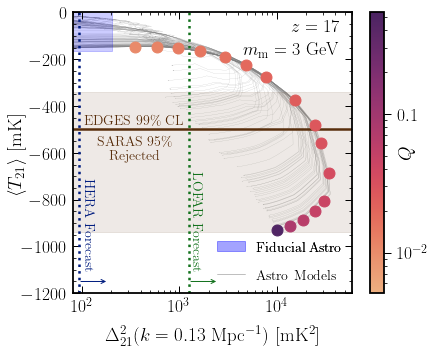

In [17]:
from matplotlib import colors
from matplotlib import cm

z_ind = 8

print('z: ', T21_fluc.data_dict['z'][z_ind])

# Create the global signal vs. power spectrum array at fixed z. Dimensions 140 x 90 x 10 x 2: astro model x Q x m_m x (global signal, power spectrum)
glob_vs_ps_ary = np.transpose([global_signal_ary[:, z_ind, :, :], power_spec_ary[:, z_ind, :, :]], axes=(1, 2, 3, 0))

plt.figure()

plt.xscale('log')

# Starting plotting from 100 MeV. Lower bound from our paper, Upper bound from combination of
# ArgoNeut (1911.07996), Super-K (2002.11732) and colliders from our paper. 

Q_min_ary = [0., 0., 5.22e-5, 9.63e-5, 1.86e-4, 3.44e-4, 6.66e-4, 1.26e-3, 2.38e-3, 4.39e-3, 8.706e-3]
Q_max_ary = [0., 0., 0.0033, 0.0067, 0.02075, 0.116, 0.237, 0.237, 0.315, 0.625]


Q_min_ind = np.argwhere(Qlis > Q_min_ary[mm_ind]).flatten()[0]
Q_max_ind = np.argwhere(Qlis < Q_max_ary[mm_ind]).flatten()[-1]

ax = plt.gca()

# Pick an example model which has a large power spectrum and global signal. 
model_ind = 36

# These are the Q indices to plot. 
# Q_indices_to_plot = [49, 55, 60, 64, 70, 74]
# print(Qlis[49], Qlis[55], Qlis[60], Qlis[64], Qlis[70], Qlis[74])
# # This is the minimum m_m to start at (1 GeV). 
# print(mmlis[4])

# Markers for m_m >= 1 GeV. 
marker_list = [ 'X', 'o', 'D', '*', 'P', 's']
# Palette for Q to plot.

# Only make the plot for 3 GeV, i.e. i = 5. 

for model_i in np.arange(140): 

    plt.plot(glob_vs_ps_ary[model_i,:,5,1]*1e6, glob_vs_ps_ary[model_i,:,5,0]*1e3, color='gray', linewidth=0.1, zorder=0)

all_astro_plot, = plt.plot(0, 0, color='gray', linewidth=0.5, label='Astro Models')

for i,_ in enumerate(mmlis):

    # Obtain the minimum and maximum Qlis indices which are experimentally allowed. 
    try: 
        Q_min_ind = np.argwhere(Qlis > Q_min_ary[i]).flatten()[0]
        Q_max_ind = np.argwhere(Qlis < Q_max_ary[i]).flatten()[-1]
    except:
        continue

    if i != 5: 
        continue

    N_Q_pts = len(Qlis[Q_min_ind:Q_max_ind+1])
    inds = np.arange(len(Qlis))

    # pt is which charge from 1 -- 6 to plot. j is the actual index of the charge in Qlis. 
    for pt,j in enumerate(inds[Q_min_ind:Q_max_ind+1]):

        palette = sns.color_palette('flare', N_Q_pts)

        if j >= Q_min_ind and j <= Q_max_ind:
            # This value of Q, i.e. Qlis[j], is allowed. 
            # print(mmlis[i], Qlis[j])

            # print(pt, glob_vs_ps_ary[model_ind,j,i,1])
            # print(pt, glob_vs_ps_ary[:,j,i,0])

            if np.nanmax(glob_vs_ps_ary[model_ind,j,i,1]*1e6, axis=0) > 2.05190707e+02: 

                # print(np.nanargmax(glob_vs_ps_ary[:,j,i,1]*1e6, axis=0), np.nanargmin(glob_vs_ps_ary[:,j,i,0]*1e3, axis=0))

                if j > 53 and j not in [55, 56, 58, 60, 75]: 
                    continue 

                plt.scatter(np.nanmax(glob_vs_ps_ary[:,j,i,1]*1e6, axis=0), np.nanmin(glob_vs_ps_ary[:,j,i,0]*1e3, axis=0), marker=marker_list[i-4], s=120, color=palette[pt], zorder=10)

        else:

            plt.scatter([0], [0])



astro_fiducial_plot = plt.fill_betweenx([min_T21[11], max_T21[11]], max_PK[11], min_PK[11], color='blue', alpha=0.2, label='Fiducial Astro')

plt.xlim(1, 5e4)

palette = sns.color_palette('dark')

# Taken from Julian's millicharged paper, and EDGES = -500 mK central value. 
plt.axhline(-500, color=palette[5])
# ax.fill_betweenx((-1e4, 1e4), 92.7, 1e6, color=palette[0], alpha=0.1)
# ax.fill_betweenx((-1e4, 1e4), 1255, 1e6, color=palette[2], alpha=0.1)
plt.axvline(92.7, color=palette[0], ls=':')
plt.axvline(1255, color=palette[2], ls=':')

ax.fill_between((-1e4, 1e6), -940, -340, color=palette[5], alpha=0.1)

plt.text(x=100, y=-1100, s='HERA Forecast', fontsize=14, color=palette[0], rotation=-90)
plt.text(x=1300, y=-1100, s='LOFAR Forecast', fontsize=14, color=palette[2], rotation=-90)
# plt.text(x=1e2, y=-480, s='EDGES Central Value', fontsize=14, color=palette[5])
plt.text(x=3.5e2, y=-630, s='SARAS 95\% \n Rejected', fontsize=14, color=palette[5], ha='center')
plt.text(x=1.05e2, y=-480, s='EDGES 99\% CL', fontsize=14, color=palette[5])
plt.text(x=1.4e4,  y=-80, s=r'$z = 17$', fontsize=18, color='k')
plt.text(x=4.5e3, y=-180, s=r'$m_\mathrm{m} = $ 3 GeV', fontsize=18, color='k')
ax.annotate(
    "", xy=(92.7, -1150), 
    xytext=(92.7*2, -1150),
    arrowprops=dict(arrowstyle="<-", color=palette[0], linewidth=1)
)
ax.annotate(
    "", xy=(1255, -1150), 
    xytext=(1255*2, -1150),
    arrowprops=dict(arrowstyle="<-", color=palette[2], linewidth=1)
)

plt.xlabel(r'$\Delta_{21}^2  (k = 0.13$ Mpc$^{-1}$) [mK$^2$]')
plt.ylabel(r'$\langle T_{21} \rangle$ [mK]', labelpad=-5)


legend1 = plt.legend(handles=[all_astro_plot], fontsize=14, bbox_to_anchor=(0.47, 0.13))
legend2 = plt.legend(handles=[astro_fiducial_plot], fontsize=14, bbox_to_anchor=(0.47, 0.23))

ax = plt.gca()

cbar = plt.colorbar(cm.ScalarMappable(norm=colors.LogNorm(vmin=Qlis[Q_min_ind], vmax=Qlis[Q_max_ind]), cmap='flare'), ax=ax)
cbar.set_label(r'$Q$', labelpad=-30)
cbar.ax.tick_params(axis='y', direction='out', which='both')


# legend1 = plt.legend(handles=mm_handles_list, ncol=2, fontsize=14, handlelength=.4, title=r'$m_m$', title_fontsize=18, columnspacing=0.8, loc='lower right')
# legend2 = plt.legend(handles=Q_handles_list, ncol=2, fontsize=14, handlelength=.6, title=r'$Q$', title_fontsize=18, columnspacing=1, loc='upper right')

ax.add_artist(legend1)

ax.add_artist(legend2)

plt.axis([80., 6e4, -1200, 0])

plt.tight_layout()

plt.savefig('plots/global_signal_vs_power_spec.pdf')

## Maximum Power Spectrum

In [18]:
# max_power_spec_ary = []

# for idx in tqdm(np.arange(140)): 

#     T21_fluc = dill.load(open('/scratch/gpfs/hongwanl/millicharged_DM_with_bath/power_spec/all_models/mc100MeV_full_smooth_deg3_'+str(idx)+'.p', 'rb'))

#     # delta2_ary has dimensions 4096 x 22 x 90 x 10, k_ary x zlis x Qlis x mmlis
#     k_ary, delta2_ary = T21_fluc.power_spec

#     for i,mm in enumerate(mmlis): 

#         if i < 4: 
#         # Only consider 1 GeV and above. 
#             continue

#         # Obtain the minimum and maximum Qlis indices which are experimentally allowed. 
#         try: 
#             Q_min_ind = np.argwhere(Qlis > Q_min_ary[i]).flatten()[0]
#             Q_max_ind = np.argwhere(Qlis < Q_max_ary[i]).flatten()[-1]
#         except:
#             continue

#         # Find the maximum power spectrum value over all k, z. 
#         max_power_spec = np.nanmax(delta2_ary[:, :, Q_min_ind:Q_max_ind+1, i], axis=2)
#         # Take the element-wise maximum with the existing table and this particular model point.
#         max_power_spec_ary.append(max_power_spec)

# dill.dump(max_power_spec_ary, open('/scratch/gpfs/hongwanl/millicharged_DM_with_bath/power_spec/all_models/max_power_spec.p', 'wb'))

In [19]:
# has dimensions 1120 x 4096 x 22, the first dimension is a combination of some values of m_m x astro models. 
max_power_spec_ary = np.array(dill.load(open('/scratch/gpfs/hongwanl/millicharged_DM_with_bath/power_spec/all_models/max_power_spec.p', 'rb')))

T21_fluc = dill.load(open('/scratch/gpfs/hongwanl/millicharged_DM_with_bath/power_spec/all_models/mc100MeV_full_smooth_deg3_1.p', 'rb'))


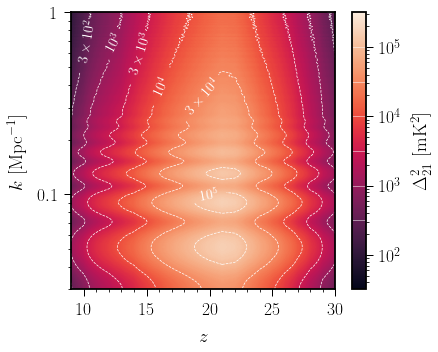

In [20]:
from matplotlib import colors
from matplotlib import cm
from scipy.interpolate import interp1d


# delta2_ary has dimensions 4096 x 22 x 90 x 10, k_ary x zlis x Qlis x mmlis
k_ary, delta2_ary = T21_fluc.power_spec


plt.figure()

plt.ylim(3e-2, 1)
plt.yscale('log')

plt.xlabel(r'$z$')
plt.ylabel(r'$k$ [Mpc$^{-1}$]')


# cplot = plt.contour(zlis, k_ary, np.nanmax(max_power_spec_ary, axis=0)*1e6, levels=[1e3, 10**(3.5), 1e4, 10**(4.5), 1e5], locator=ticker.LogLocator(), cmap='flare')

# fmt = {}

# strs = [r'$10^3$', r'$10^{3.5}$', r'$10^4$', r'$10^{4.5}$', r'$10^5$']

# for l, s in zip(cplot.levels, strs): 
    
#     fmt[l] = s

ax = plt.gca()

data = np.nanmax(max_power_spec_ary, axis=0)*1e6

data[data < 0] = 1e-100

# zlis_fine = np.arange(9, 30, 0.2)

# dill.dump((zlis, k_ary, data), open('/home/hongwanl/max_power_spec_ary.p', 'wb'))

data_fine_interp = interp1d(zlis, data)


# cplot = ax.contourf(zlis, k_ary, data, [1e2, 10**(2.5), 1e3, 10**(3.5), 1e4, 10**(4.5), 1e5, 10**(5.5)], cmap='rocket', norm=colors.LogNorm())
cplot = ax.contourf(zlis, k_ary, data, levels=np.logspace(2, 6, 300), cmap='rocket', norm=colors.LogNorm(vmin=10**(1.5), vmax=10**(5.5)))
# for c in cplot.collections:
#     c.set_edgecolor("face")
    
cs1 = ax.contour(zlis, k_ary, data, [10**(2.5), 1e3, 10**(3.5)], colors='w', linestyles='--', linewidths=0.7)

fmt = {}
strs = [r'$3 \times 10^2$', r'$10^3$', r'$3 \times 10^3$']
for l, s in zip(cs1.levels, strs): 
    fmt[l] = s

ax.clabel(cs1, fmt=fmt, colors='w', fontsize=14, manual=[(10, 0.7), (12, 0.7), (14, 0.6)], inline_spacing=13)

cs2 = ax.contour(zlis, k_ary, data, [1e4, 10**(4.5), 1e5], colors='w', linestyles='--', linewidths=0.7)
fmt = {}
strs = [r'$10^4$', r'$3 \times 10^4$', r'$10^5$']
for l, s in zip(cs2.levels, strs): 
    fmt[l] = s

ax.clabel(cs2, fmt=fmt, colors='w', fontsize=14, manual=[(16, 0.4), (19, 0.4), (20, 0.1)], inline_spacing=13)


ax.tick_params(axis='x', direction='out', which='both', top=False)
ax.tick_params(axis='y', direction='out', which='both', right=False)

# ax.tick_params(axis='y', colors='w', which='both')
# plt.setp(ax.get_yticklabels(), color='k')

cbar = plt.colorbar(cm.ScalarMappable(norm=colors.LogNorm(vmin=10**(1.5), vmax=10**(5.5)), cmap='rocket'), ax=ax)
cbar.set_label(r'$\Delta_{21}^2$ [mK$^2$]')

for l in [10**(2.5), 1e3, 10**(3.5), 1e4, 10**(4.5), 1e5]:

    cbar.ax.plot([0,1], [l, l], 'w', linewidth=0.5)

cbar.ax.tick_params(axis='y', direction='out', which='both')

plt.tight_layout()

plt.savefig('plots/max_power_spec.pdf')